In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.stats import multivariate_normal

In [2]:
#load the data
def load():
    df = pd.read_excel (r'Concrete_Data.xls')
    return df

In [3]:
def scale(df):
#scale the data to [0-1] range
    col=df.columns
    v = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    v_scaled = min_max_scaler.fit_transform(v)
    df = pd.DataFrame(v_scaled, columns=col)
    return df

In [4]:
def splits(df):
#randomly split the train and test datasets
    #kf =  RepeatedKFold(n_splits=5, n_repeats=1)
    kf =  RepeatedKFold(n_splits=10, n_repeats=1, random_state=12883823)
    df_train_l=[]
    df_test_l=[]
    for train, test in kf.split(df):
        df_train_l.append(train.reshape(-1,1))
        df_test_l.append(test.reshape(-1,1))
    return df_train_l,df_test_l


In [5]:
def getXandY(ind,df):
    #separate the data and the labels
    df=df.to_numpy()
    df=df[ind]
    Y=df[:,0,8].reshape(-1,1)
    X=df[:,0,0:8]
    return X,Y

In [ ]:
def sigmoidf (X):
    return  1 / (1 + np.exp(-X))


In [ ]:
def gaussianpr(X):
    M=np.mean(X,axis=0)
    S=np.std(X,axis=0)
    print("mean is",M)
    print("S is ",S)
    return np.exp(-0.5 *((X- M)/S)*((X-M )/S))

In [11]:
def calculateW(X_train,Y_train,llambda):
    xtx=np.dot(X_train.T,X_train)+llambda
    xtxinv=np.linalg.inv(xtx) 
    xtxinvxt=np.dot(xtxinv,X_train.T)
    thetaclosed=np.dot(xtxinvxt,Y_train)
    return thetaclosed


In [12]:
def predict(X_test,thetaclosed):
    Yparr=np.dot(thetaclosed.T,X_train.T)
    return Yparr

In [17]:
#calculating the accuracy and the confudion matrix
def evaluation(Y_test,Y_pred):
    errorr=(1/(2*Y_test_pred.shape[1]))*np.sqrt(np.sum(np.multiply((Y_test- Y_pred),(Y_test- Y_pred))))
    return errorr

In [20]:
def plot_accuracy(train_acc_l,test_acc_l):
    x= [i for i in range(1,11)]
    plt.plot(x, train_acc_l , 'b^',linestyle='-',label='train_error')
    plt.plot(test_acc_l , 'g+',linestyle='-',label='test_error')
    plt.xlabel('k folds')
    plt.ylabel('error')
    plt.legend()
    plt.show()

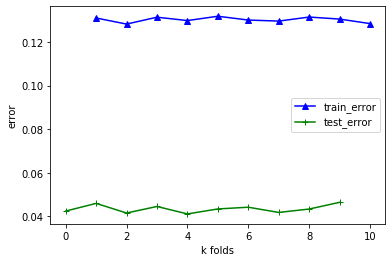

train_acc [0.1310841500562927, 0.12828961988788748, 0.1314495997766607, 0.12990679836611405, 0.13189093297856785, 0.13014340045561928, 0.12966660048580833, 0.13151887249995145, 0.13058947257366343, 0.12851407596004405]
test_acc [0.04236983770267602, 0.04589819047894411, 0.04148389113924349, 0.04447516958087244, 0.041061733523371495, 0.04334541721967013, 0.0441414749060566, 0.04174503939462863, 0.04329916326415924, 0.046384923783661366]
avg_acc_train 0.11845941118550994
avg_acc_test 0.03947316736302577


In [21]:
#main
llambda=0.8
df=load()
df=scale(df)
df_train_l,df_test_l=splits(df)
train_acc_l=[]
test_acc_l=[]
for i in range (len(df_train_l)):
    df_train=df_train_l[i]
    df_test=df_test_l[i]
    X_train,Y_train=getXandY(df_train,df)
    X_test,Y_test=getXandY(df_test,df)    
    thetaclosed=calculateW(X_train,Y_train,llambda)
    # basis functions
    #X_train=sigmoidf(X_train)
    #X_train=X_train**2
    #X_train=X_train* np.log(X_train)
    #X_train=gaussianpr(X_train)
    #X_train=np.sin(X_train)
    #but they were not producing better results so i used the linear function
    Y_train_pred=predict(X_train,thetaclosed)
    Y_test_pred=predict(X_test,thetaclosed)
    train_acc=evaluation(Y_train,Y_train_pred)
    test_acc=evaluation(Y_test,Y_test_pred)
    train_acc_l.append(train_acc)
    test_acc_l.append(test_acc)
avg_acc_train=sum(train_acc_l)/11
avg_acc_test=sum(test_acc_l)/11

plot_accuracy(train_acc_l,test_acc_l)
print("train_acc",train_acc_l)
print("test_acc",test_acc_l)
print("avg_acc_train",avg_acc_train)
print("avg_acc_test",avg_acc_test)